In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers",target_size=(128,128),batch_size=32,class_mode="categorical")

Found 4327 images belonging to 5 classes.


In [10]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers",target_size=(128,128),batch_size=32,class_mode="categorical")

Found 4327 images belonging to 5 classes.


In [11]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [12]:
model = Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [17]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [18]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [19]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [21]:
model.fit_generator(x_train,steps_per_epoch=100,epochs=20,validation_data=x_test,validation_steps=80)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
100/100 [==============================] - 98s 979ms/step - loss: 0.8488 - accuracy: 0.6709 - val_loss: 0.8596 - val_accuracy: 0.6711
Epoch 2/20
100/100 [==============================] - 101s 1s/step - loss: 0.8208 - accuracy: 0.6756 - val_loss: 0.8003 - val_accuracy: 0.6902
Epoch 3/20
100/100 [==============================] - 106s 1s/step - loss: 0.7908 - accuracy: 0.6972 - val_loss: 0.8430 - val_accuracy: 0.6875
Epoch 4/20
100/100 [==============================] - 103s 1s/step - loss: 0.7666 - accuracy: 0.7099 - val_loss: 0.7743 - val_accuracy: 0.7051
Epoch 5/20
100/100 [==============================] - 101s 1s/step - loss: 0.7599 - accuracy: 0.7112 - val_loss: 0.7228 - val_accuracy: 0.7230
Epoch 6/20
100/100 [==============================] - 98s 983ms/step - loss: 0.7473 - accuracy: 0.7143 - val_loss: 0.6398 - val_accuracy: 0.7586
Epoch 7/20
100/100 [==============================] - 101s 1s/step - loss: 0.7224 - accuracy: 0.7263 - val_loss: 0.6319 - val_accuracy: 0.

In [26]:
model.save("/content/flower.h5")

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
import numpy as np

In [30]:
model = load_model("/content/flower.h5")

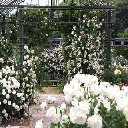

In [31]:
img = image.load_img(r"/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers/rose/14312910041_b747240d56_n.jpg",target_size=(128,128))
img

In [32]:
type(img)

PIL.Image.Image

In [33]:
x = image.img_to_array(img)
x

array([[[118., 114., 115.],
        [253., 251., 255.],
        [ 54.,  53.,  48.],
        ...,
        [ 92., 107.,  68.],
        [ 74.,  86.,  64.],
        [ 72.,  84.,  64.]],

       [[147., 150., 155.],
        [ 43.,  47.,  50.],
        [252., 255., 255.],
        ...,
        [ 71.,  87.,  51.],
        [ 88., 103.,  72.],
        [ 59.,  72.,  52.]],

       [[187., 197., 186.],
        [213., 213., 221.],
        [ 89.,  96.,  89.],
        ...,
        [123., 137., 112.],
        [ 92., 107.,  78.],
        [ 52.,  65.,  48.]],

       ...,

       [[ 84.,  64.,  65.],
        [ 76.,  53.,  47.],
        [ 83.,  60.,  54.],
        ...,
        [129., 123.,  89.],
        [100., 105.,  85.],
        [ 59.,  73.,  48.]],

       [[ 88.,  79.,  72.],
        [132., 116., 117.],
        [ 81.,  68.,  62.],
        ...,
        [ 50.,  49.,  44.],
        [ 42.,  49.,  41.],
        [ 30.,  41.,  24.]],

       [[184., 174., 175.],
        [192., 177., 180.],
        [127., 1

In [34]:
x.shape

(128, 128, 3)

In [35]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [36]:
pred_prob = model.predict(x)
pred_prob

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [37]:
class_name = ["daisy","dandelion","rose","sunfower","tulip"]
pred_id = pred_prob.argmax(axis=1)[0]
pred_id

0

In [38]:
print("Predicted animal is",str(class_name[pred_id]))

Predicted animal is daisy
